In [33]:

# DSCI6003 1.1 Lab


## Part 1: Linear Algebra Practice:

### Part 1.1

The stochastic matrix is central to the Markov process. It is a square matrix specifying that probabilities of going from one state to the other such that every column of the matrix sums to 1.

The probability of entering a certain state depends only on the last state occupied and the stochastic matrix, not on any earlier states.

Suppose that the 2004 **state of land use** in a city of 60 mi^2 of built-up
area is:

```
In 2004:
   
C (Commercially Used): 25%
I (Industrially Used): 20%
R (Residentially Used): 55%
```

1. Use numpy array ops to find the **state of land use** in **2009** and **2014**,
   assuming that the transition probabilities for 5-year intervals are given
   by the matrix **A** and remain practically the same over the time considered.
   
   <div align="center">
      <img src="images/transition_matix_A.png">
   </div>
   
   
<br>

### More about stochastic matrices - Markov transition matrices
The Markov transition matrix has some special properties.  The wikipedia page has a good summary.  
https://en.wikipedia.org/wiki/Stochastic_matrix

2.  Does the stochastic matrix for land use have any disconnected segments or nodes with no outgoing edges?  

3.  Find the probabilities associated with unit eigenvalues by two means.  
    a.  Starting from any legitimate distribution of initial land use (they have to be probabilities - all positive and sum equals one), iteratively apply the transition matrix until the results stop changing (within some tolerance).  
    b.  Use numpy to extract eigenvalues and eigenvectors.  Is that an eigenvalue equal to one?  Identify the eigenvector corresponding to eigenvalue that equals one and compare it to the result you got by iterating.  

SyntaxError: invalid syntax (<ipython-input-33-f4ff66cc9dea>, line 9)

In [34]:
# Use numpy array ops to find the state of land use in 2009 and 2014, assuming that the transition probabilities for 5-year intervals are given by the matrix A and remain practically the same over the time considered.

import numpy as np

x = np.array([.25, .2, .55])
A = np.array([[.7, .1, 0], [.2, .9, .2], [.1, 0, .8]])

# 2004 to 2009
print(np.linalg.matrix_power(A, 5)@x)

# 2004 to 2014
print(np.linalg.matrix_power(A, 10)@x)

[ 0.1708675  0.588234   0.2408985]
[ 0.20417519  0.65348449  0.14234032]


1. no, all nodes have outgoing edges

In [35]:
# probabilities associated with unit eigenvalues
# a
# initial land use distribution
init = np.array([.34, .33, .33])

# use error toleance 10**-2
t = A.dot(init)
while np.linalg.norm(init - t) > 10**-999:
    t = init
    init = A.dot(init)
#     print(np.linalg.norm(init-t))
print(init)

[ 0.22222222  0.66666667  0.11111111]


In [36]:
# b. Use numpy to extract eigenvalues and eigenvectors.
# Is that an eigenvalue equal to one? Identify the eigenvector corresponding to eigenvalue that equals one and compare
# it to the result you got by iterating. 
w, v = np.linalg.eig(A)

indices = w.argsort()
indices

largest = np.array(v[:, indices[-1]]).flatten().real
largest / largest.sum()

array([ 0.22222222,  0.66666667,  0.11111111])

### Part 1.2

This following question uses the `iris` dataset. Load the data in with the following code.  Here's a description of the iris data.  https://en.wikipedia.org/wiki/Iris_flower_data_set  
   
```python
from sklearn import datasets
# The 1st column is sepal length and the 2nd column is sepal width
sepalLength_sepalWidth = datasets.load_iris().data[:, :2]
```
  
1. Make a scatter plot of sepal width vs sepal length
  
2. Use numpy.mean to compute the mean vector (column-wise) of the data matrix. The `shape`
   of the mean vector should be `(1, 2)`
     
   Plot the mean vector on the scatter plot in `1.` 

   <div align="center">
    <img src="images/mean.png">
   </div>

Populating the interactive namespace from numpy and matplotlib


/Users/justin/anaconda/envs/nlp/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['indices']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


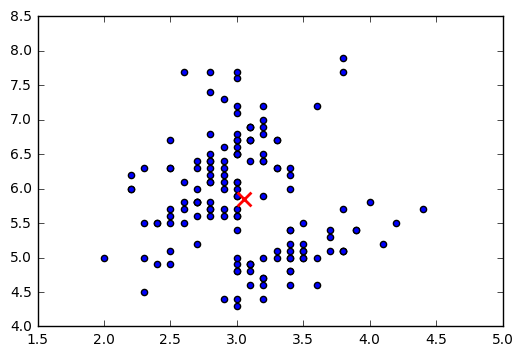

In [37]:
%pylab inline
from sklearn import datasets
import pandas as pd
# The 1st column is sepal length and the 2nd column is sepal width
sepalLength_sepalWidth = datasets.load_iris().data[:, :2]

sl_sw = pd.DataFrame(sepalLength_sepalWidth, columns=['s1', 'sw'])

plt.scatter(sl_sw['sw'], sl_sw['s1']);

t = np.mean(sl_sw, axis=0)
plt.scatter(t[1], t[0], c='r', marker='x', s=100, edgecolor='r', linewidth='2');

#3.  Use the pandas scatter_matrix to do cross plotting for all of the variables in the iris data set.  If you provide labels, the points will get colored according to label which makes it easier to see how the classes are separated. Here's the reference material in pandas.  http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html  Search on scatter_matrix to get the exact function.  

Change to the full iris data set.  datasets.load_iris().data
#3. Write a function (`euclidean_dist`) to calculate the euclidean distance between two rows of data from the data matrix.  

#4. Write a function (`cosine_sim`) to calculate the cosine similarity_between two rows of data.  

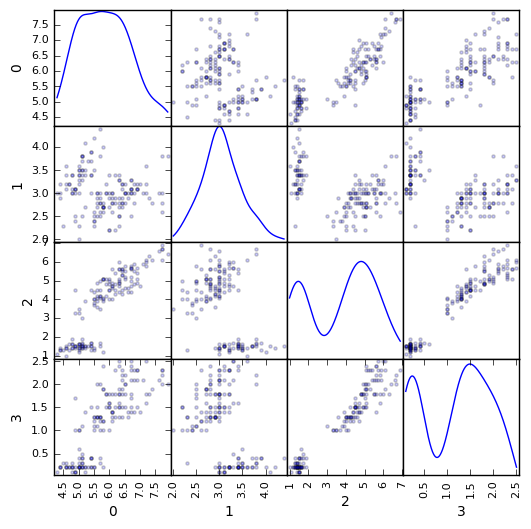

In [38]:
from pandas.tools.plotting import scatter_matrix

df = datasets.load_iris().data[:]
df = pd.DataFrame(df)

scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde');

In [39]:
print(df.xs(0)) # select the row
df.xs(0).shape

0    5.1
1    3.5
2    1.4
3    0.2
Name: 0, dtype: float64


(4,)

In [40]:
# #3. Write a function (euclidean_dist) to calculate the euclidean distance between two rows of data from the 
# data matrix. 
def euclidean_dist(x, y):
    return np.sqrt(sum((x-y)**2))  # works for vector valued
    
# x = np.array([1, 2, 3])
# y = np.array([4, 5, 6])

x = df.xs(0)
y = df.xs(1)

print(euclidean_dist(x,y))

0.538516480713


In [41]:
# Write a function (cosine_sim) to calculate the cosine similarity_between two rows of data. 
def cosine_sim(x, y):
    x = np.asarray(x)
    y = np.asarray(y)
    return (x@y) / (norm(x) * norm(y))


print(cosine_sim(x,y))

0.998579163504


#5. Write a program to loop through all the data points in the iris data set calculate the distances between each point and the overall mean that you calculated above.          
   **Input of the function:**
     - Data matrix as an ndarray
     - Function to compute distance metric (Euclidean / Cosine Similarity)
      
   **Output of the function:**
     - An array shaped `(150, 1)`
      
      
   Use the function to compute Euclidean Distance and Cosine Similarity between each of
   the data points and the mean of the data points. You should be able to call the function
   in this manner:

   ```python
   euclidean_dists = compute_dist(sepalLength_sepalWidth, euclidean_dist)
   cosine_sims = compute_dist(sepalLength_sepalWidth, cosine_sim)
   ```
#6. Plot histograms of the euclidean distances and cosine similarities.

In [42]:
len(sepalLength_sepalWidth)

150

In [43]:
# 5.
def compute_dist(dataframe, function):
    a = []
    for i in range(len(dataframe)):
#         for j in range(len(dataframe[0])):
            a.append(function(dataframe[i], np.mean(dataframe, axis=0)))
    return np.asarray(a)
            
            
euclidean_dists = compute_dist(sepalLength_sepalWidth, euclidean_dist)
len(euclidean_dists)

150

In [44]:
cosine_sims = compute_dist(sepalLength_sepalWidth, cosine_sim)
len(cosine_sims)

150

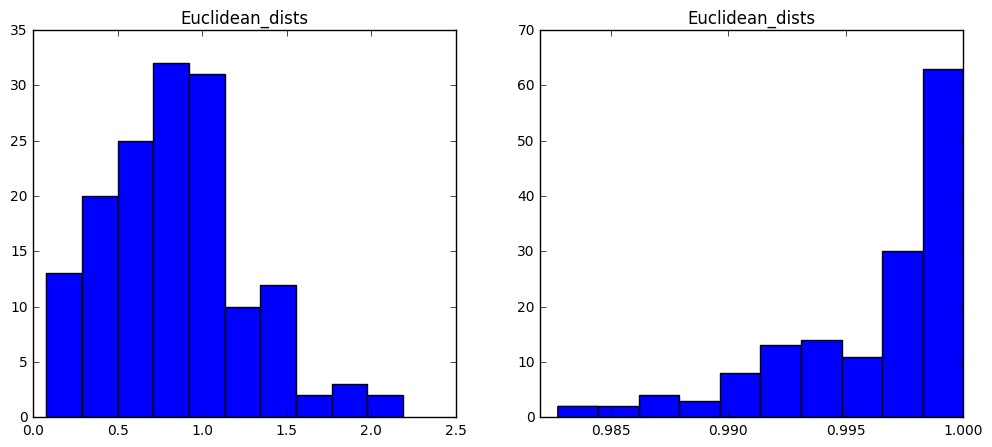

In [45]:
fig = figsize(12, 5)
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.hist(euclidean_dists);
ax1.set_title("Euclidean_dists");
ax2.hist(cosine_sims);
ax2.set_title("Euclidean_dists");

## Implementing the PageRank Algorithm

The [Page Rank Algorithm](http://en.wikipedia.org/wiki/PageRank) is used by Google Search (in their early days) to rank websites in their search engine in terms of the importance of webpages. Here's a good one page summary of Page rank algo.  http://www.math.cornell.edu/~mec/Winter2009/RalucaRemus/Lecture3/lecture3.html . And a couple of other references.  [More about PageRank](http://books.google.com/books/p/princeton?id=5o_K4rri1CsC&printsec=frontcover&source=gbs_ViewAPI&hl=en#v=onepage&q&f=false)

We will implement PageRank on this simple network of websites.

   <div align="center">
    <img src="images/pageweb.png">
   </div>

**In the above image:**
   - Each node is a web page
   - Each directed edge corresponds to one page referencing the other
   - These web pages correspond to the states our Markov chain can be in
   - Assume that the model of our chain is that of a random surfer/walker.

In this model, we transition from one web page (state) to the next with
equal probability (to begin).  Or rather we randomly pick an outgoing edge
from our current state.  Before we can do any sort of calculation we need to
know how we will move on this Markov Chain.

1. Create an `numpy ndarray` representing the transition probabilities between
   nodes for **the above network (in the image)**. The position _i_, _j_ in the matrix corresponds to the
   probability of going from node _i_ to node _j_.

2. Now that we have a transition matrix, the next step is to iterate on this
   from one page to the next (like someone blindly navigating the internet) and
   see where we end up. The probability distribution for our random surfer can
   be described in this matrix notation as well (or vector rather).

   Initialize a vector for the probability of where our random surfer is.
   It will be a vector with length equal to the number of pages.
   Initialize it to be equally probable to start on any page
   (i.e. you start randomly in a state on the chain).

3. To take a step on the chain, simply matrix multiple our user vector by the
   transition matrix.
   After one iteration, what is the most likely location for your random surfer?

4. Plot how the probabilities change.
   Iterate the matrix through the first ten steps.
   At each step create a bar plot of the surfers probability vector.

In [46]:
A = np.array([[0, 1, 0, 0, 0], [1, 0, 1, 0, 0], [1, 1, 0, 0, 1], [1, 0, 0, 0, 0], [0, 1, 1, 1, 0]])

# transition matrix
M = A/sum(A, axis=0)

# initialize vector
v = np.array([.2]*5)

# take step along the chain
M@v

array([ 0.06666667,  0.16666667,  0.33333333,  0.06666667,  0.36666667])

the most likely location after one iteration is node E

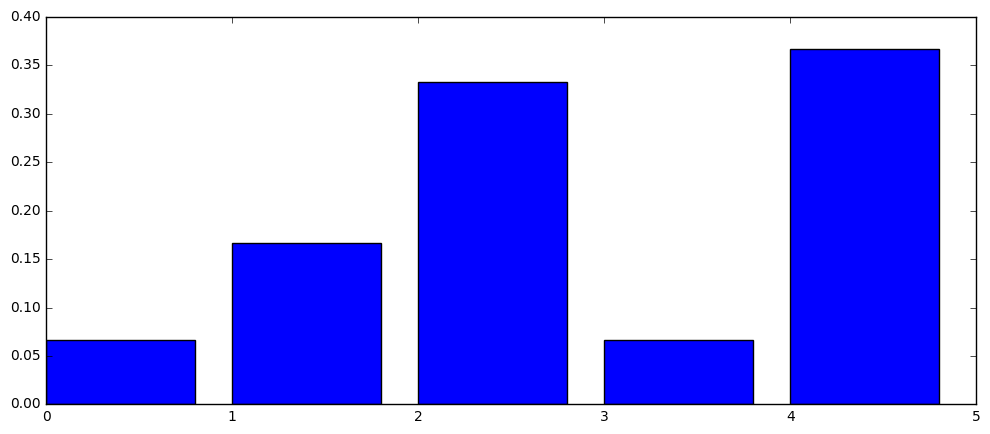

In [47]:
# plot how the probabilities change, iterate the matrix through the first 10 steps
plt.bar(range(5), M@v);

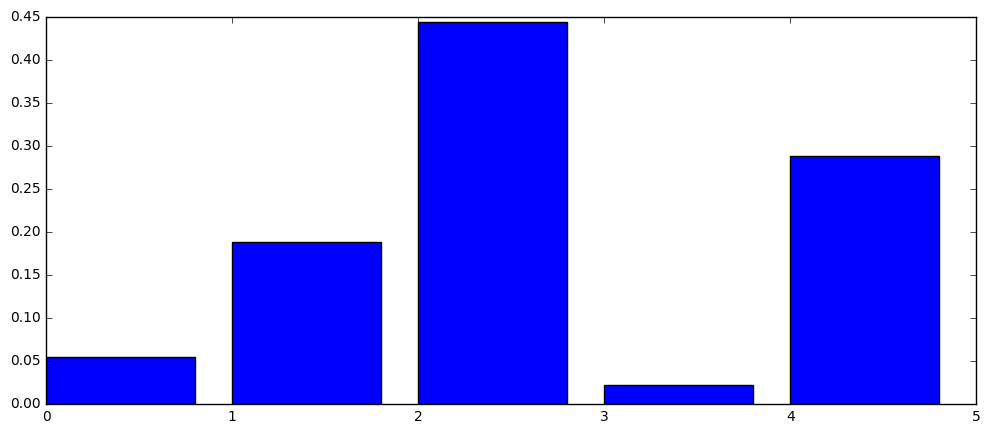

In [48]:
np.linalg.matrix_power(M, 2)@v.real
plt.bar(range(5), np.linalg.matrix_power(M, 2)@v.real);

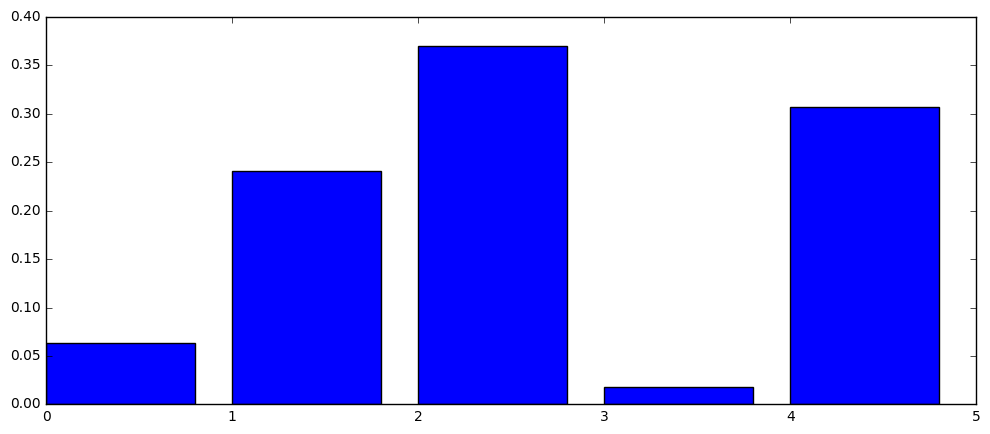

In [49]:
plt.bar(range(5), np.linalg.matrix_power(M, 3)@v.real);

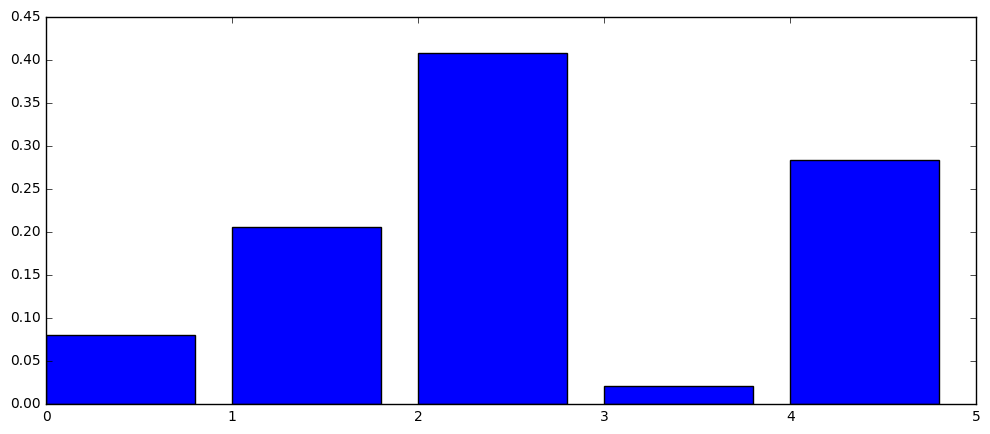

In [50]:
plt.bar(range(5), np.linalg.matrix_power(M, 4)@v.real);

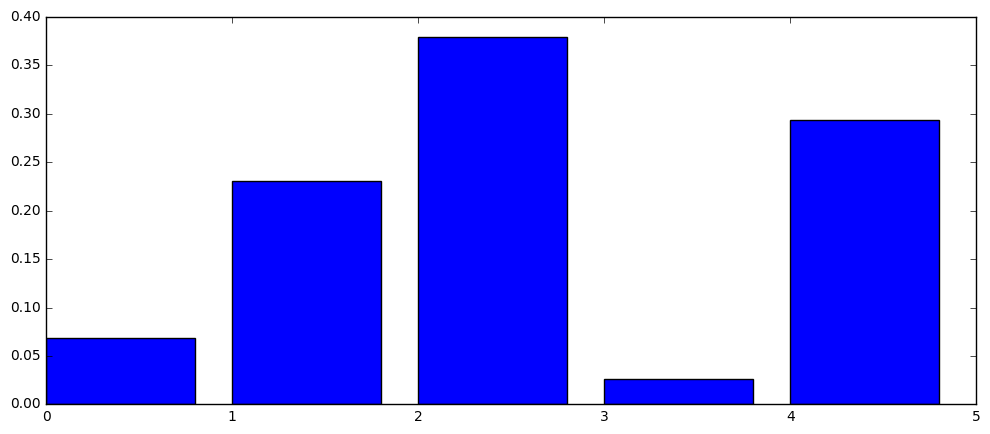

In [51]:
plt.bar(range(5), np.linalg.matrix_power(M, 5)@v.real);

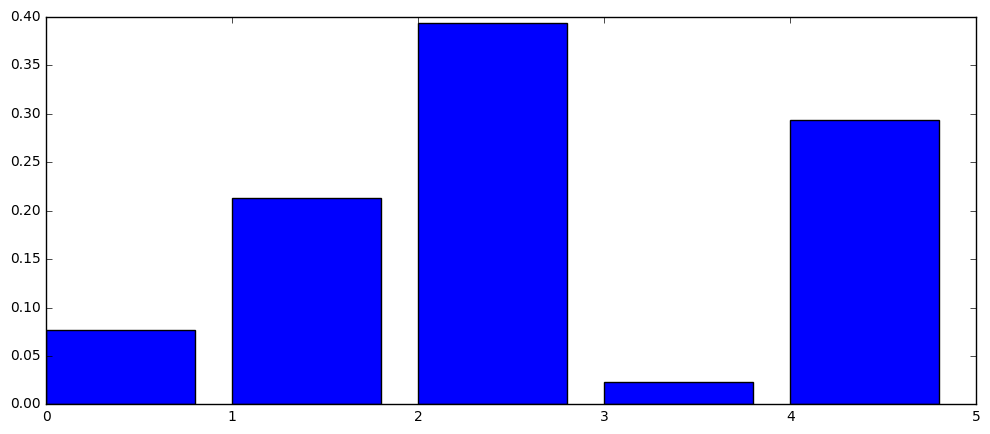

In [52]:
plt.bar(range(5), np.linalg.matrix_power(M, 6)@v.real);

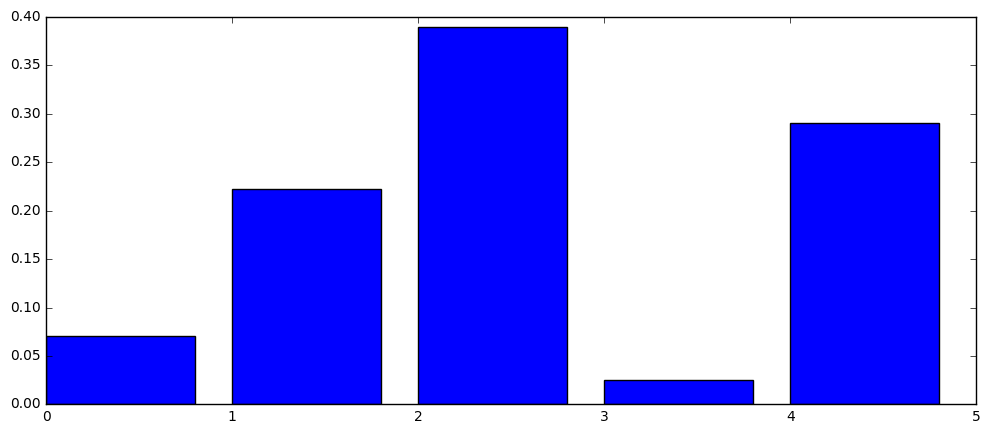

In [53]:
plt.bar(range(5), np.linalg.matrix_power(M, 7)@v.real);

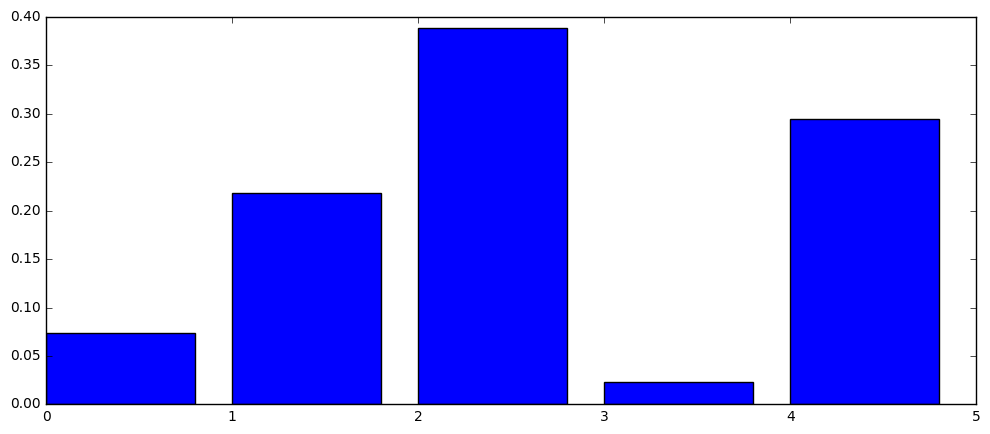

In [54]:
plt.bar(range(5), np.linalg.matrix_power(M, 8)@v.real);

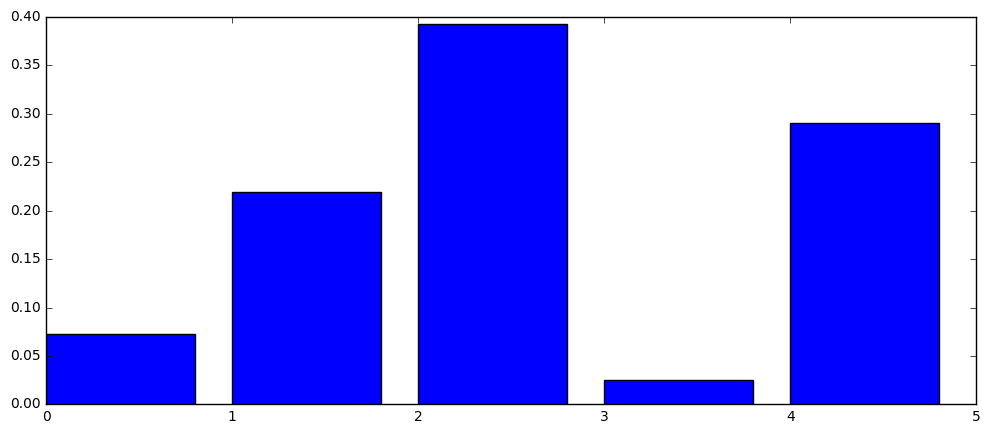

In [55]:
plt.bar(range(5), np.linalg.matrix_power(M, 9)@v.real);

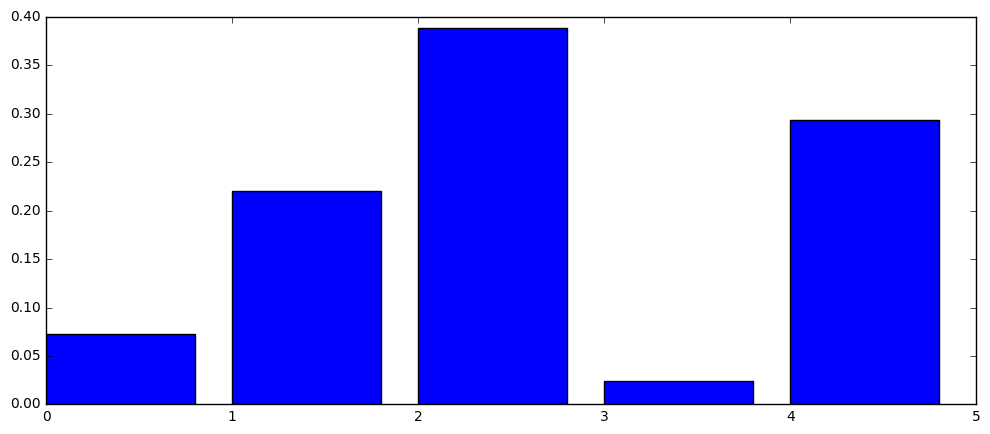

In [56]:
plt.bar(range(5), np.linalg.matrix_power(M, 10)@v.real);

In [57]:
np.linalg.matrix_power(M, 10)@v.real

array([ 0.07301436,  0.22055793,  0.3881158 ,  0.02429338,  0.29401853])

#5. This time to compute the stationary distribution, we can use numpy's
   matrix operations. Using the function for calculating [eigenvectors](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html) compute the
   stationary distribution (page rank).  Is it the same as what you found
   from above?  What is it's eigenvalue?
   
   **Hint:** 
   - The stationary state is represented by the real form of the left (first) eigenvector
   - The left eigenvector obtained from `numpy.linalg.eig` has to be normalized
   
#6.  Implement Page and Brin's solution for dealing with isolated portions of the transition graph.  Try different values for the damping factor to see how much effect it has on the probabilities. 

In [58]:
eigenvalues, eigenvectors = np.linalg.eig(M)
indices = eigenvalues.argsort()
largest = np.array(eigenvectors[:, indices[-1]]).flatten().real
largest / float(largest.sum())

array([ 0.07317073,  0.2195122 ,  0.3902439 ,  0.02439024,  0.29268293])

Yes it is the same, the principal eigenvalue is 1.

In [59]:
# we introduce a teleportation constant, or damping factor to the equation.  Let's start with epsilon = .85

In [60]:
def page_rank(G, epsilon=.85):
    """
    This algorithm proceeds as follows:
    1. construct A based on the connected structure of the network, where Aij = 1/di if node i connects to node j and di
    is the total number of unique outgoing links from page i
    2. find X s.t. X = e[_1_] + (1-e)*A.T*X, where e is a constant, and [_1_] is a column vector of 1s.  The value X[i]
    is the rank of the ith page.
        # start with a value of X, where each component is 1/n, where n is the number of nodes
        # then, perform the eigenvector solver on the matrix e*[_1_] + (1-e)*A.T
    :param epsilon: the damping factor default initialized to .85
    :param G: matrix representation of a graph of nodes and edges
    :return: dictionary of nodes with PageRank as value
    """

    # construct A based on the connected structure of the network, where Aij = 1/di if node i connects to node j and di
    # is the total number of ! outgoing links from page i
    # A = nx.google_matrix(G)
    # A represents the transition matrix that describes the Markov chain

#     M = nx.to_numpy_matrix(G)  # construct adjacency matrix M
    M = G
    # print("M", M)

    # the personalization vector uses a uniform distribution to create a dictionary with a key for each node and nonzero
    # personalization value for each node.
    n = len(G)
    dangling_weights = np.repeat(1.0 / n, n)  # repeat 1/n, n times

    # dangling nodes are nodes with no out links
    # first return position is array of indices where rows sum to 0

    # assign dangling_weights to any dangling nodes
    dangling_nodes = np.where(M.sum(axis=1) == 0)[0]  # rows that sum to 0
    for x in dangling_nodes:
        M[x] = dangling_weights

#     M /= M.sum(axis=1)  # divide each element its column sum, so column sums to 1
    M = M/sum(M, axis=0)

#     print(M)
    
    # A represents the transition matrix that describes the Markov chain
    A = epsilon * M + (1 - epsilon) * dangling_weights
    
    # use numpy linear algebra package eigenvalue/eigenvector solver
    eigenvalues, eigenvectors = np.linalg.eig(A)

#     print(eigenvectors)
    # pprint.pprint(eigenvalues)
    # pprint.pprint(eigenvectors)

    # stochastic matrix guarantees that principal eigenvalue is 1
    # sort the indices of the eigenvalues
    indices = eigenvalues.argsort()  # argsort returns the indices of the sorted list

    # normalized eigenvector corresponding to largest eigenvalue at indices[-1]
    largest = np.array(eigenvectors[:, indices[-1]]).flatten().real

    # normalize the largest eigenvector
    return largest / float(largest.sum())

In [61]:
A = np.array([[0, 1, 0, 0, 0], [1, 0, 1, 0, 0], [1, 1, 0, 0, 1], [1, 0, 0, 0, 0], [0, 1, 1, 1, 0]])

# let's try different damping factors and see how it affects the probabilities
page_rank(A)

array([ 0.08891447,  0.20793344,  0.3593906 ,  0.05519243,  0.28856905])

In [62]:
page_rank(A, epsilon = .01)

array([ 0.19866556,  0.19966894,  0.20134437,  0.19866222,  0.20165891])

In [63]:
page_rank(A, epsilon = .99)

array([ 0.07415048,  0.2186378 ,  0.38821848,  0.02646966,  0.29252358])

In [64]:
page_rank(A, epsilon = .5)

array([ 0.13229399,  0.19376392,  0.28685969,  0.122049  ,  0.26503341])